Importing Libraries


In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pydub
from pydub import AudioSegment
from IPython.display import Audio
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pyaudioop'

Loading a single voice


In [2]:
path = 'C:/Users/Admin/Desktop/SER/Dataset/RAVDESS/Actor_01/03-01-06-01-01-02-01.wav' 
audio_data, sr = librosa.load(path, sr=None)  # sr=None preserves the original sampling rate

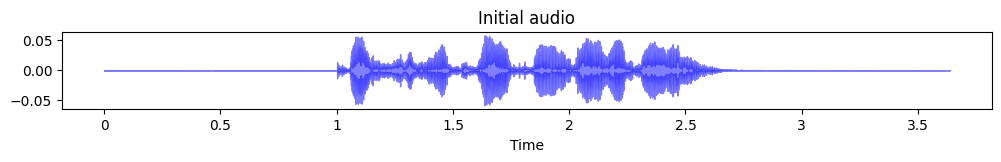

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [8]:
rawsound = AudioSegment.from_file(path)
x, sr = librosa.load(path, sr = None)

plt.figure(figsize=(12,1))
librosa.display.waveshow(
    y=x,
    sr=sr,  # Optional: sampling rate
    alpha=0.5,  # Optional: transparency
    color='b'  # Optional: color of the waveform
)
plt.title('Initial audio')
plt.show()

rawsound

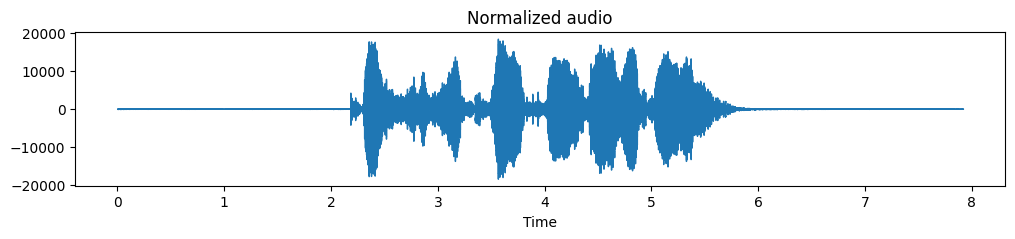

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [12]:
# 2. Normalize to +5.0 dBFS, Transform audio signals to an array
normalizedsound = effects.normalize(rawsound, headroom=5.0)
normal_x = np.array(normalizedsound.get_array_of_samples(), dtype='float32')

plt.figure(figsize=(12,2))
librosa.display.waveshow(y=normal_x)  # Changed from waveplot to waveshow
plt.title('Normalized audio')
plt.show()

normalizedsound

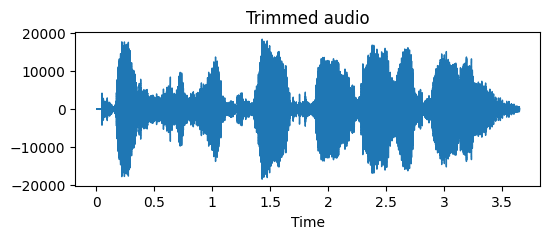

In [20]:
# 3. Trim silence in the beginning and end
xt, index = librosa.effects.trim(normal_x, top_db=30)

plt.figure(figsize=(6,2))
librosa.display.waveshow(y=xt)  # Changed to use keyword argument 'y'
plt.title('Trimmed audio')
plt.show()

ipd.display(ipd.Audio(data=xt, rate=sr))

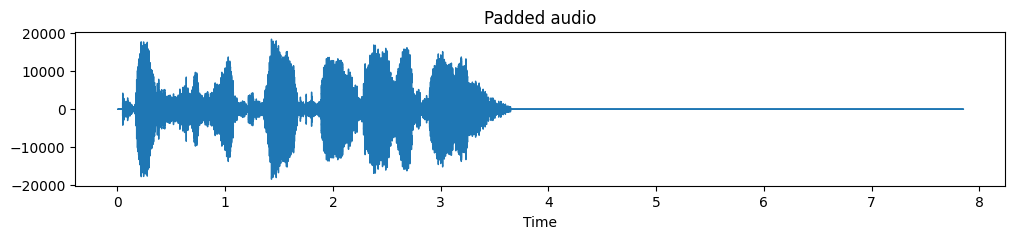

In [19]:
# 4. Right-side padding for length equalization
padded_x = np.pad(xt, (0, 173056-len(xt)), 'constant')

plt.figure(figsize=(12,2))
librosa.display.waveshow(y=padded_x)  # Changed from waveplot to waveshow
plt.title('Padded audio')
plt.show()

ipd.display(ipd.Audio(data=padded_x, rate=sr))

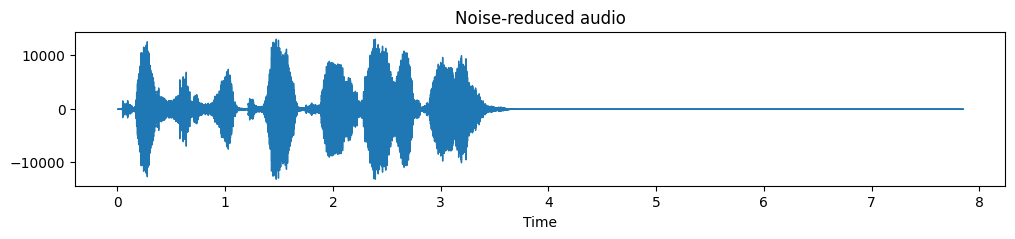

In [17]:
import noisereduce as nr
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# 5. Noise reduction
final_x = nr.reduce_noise(y=padded_x,  # Changed audio_clip to y
                         sr=sr,        # Added sample rate parameter
                         prop_decrease=1.0)  # Removed noise_clip parameter

plt.figure(figsize=(12,2))
librosa.display.waveshow(y=final_x)  # Changed waveplot to waveshow
plt.title('Noise-reduced audio')
plt.show()

ipd.display(ipd.Audio(data=final_x, rate=sr))

In [21]:
import librosa
import numpy as np

# Feature extraction
frame_length = 2048
hop_length = 512

# 1. Energy - Root Mean Square (RMS)
f1 = librosa.feature.rms(y=final_x,  # Changed parameter name to y
                        frame_length=frame_length, 
                        hop_length=hop_length)
print('Energy shape:', f1.shape)

# 2. Zero Crossing Rate (ZCR)
f2 = librosa.feature.zero_crossing_rate(y=final_x,  # Changed parameter name to y
                                      frame_length=frame_length, 
                                      hop_length=hop_length)
print('ZCR shape:', f2.shape)

# 3. MFCCs
f3 = librosa.feature.mfcc(y=final_x,  # Changed parameter name to y
                         sr=sr, 
                         n_mfcc=13, 
                         hop_length=hop_length)
print('MFCCs shape:', f3.shape)

Energy shape: (1, 339)
ZCR shape: (1, 339)
MFCCs shape: (13, 339)
